<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [30]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
url

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html'

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [31]:
import requests
from bs4 import BeautifulSoup 
from openpyxl import Workbook
import pandas as pd


Download the webpage at the url


In [33]:
html_data = requests.get(url).text

Create a soup object


In [36]:
soup = BeautifulSoup(html_data,"html.parser")

Scrape the `Language name` and `annual average salary`.


In [37]:
table = soup.find('table')

In [41]:
rows = []
for row in table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 4:
        language = cols[1].text.strip()
        salary_str = cols[3].text.strip().replace('$', '').replace(',', '')
        try:
            salary = int(salary_str)
            rows.append([language, salary])
        except ValueError:
            print(f"Skipping row with invalid salary: {salary_str}")

# Step 4: Save to CSV
df = pd.DataFrame(rows, columns=["language_names", "average_salaries"])
df.to_csv("popular-languages.csv", index=False)

print(" Data extracted and saved correctly to 'popular-languages.csv'")

Skipping row with invalid salary: Average Annual Salary
 Data extracted and saved correctly to 'popular-languages.csv'


In [43]:
import matplotlib.pyplot as plt

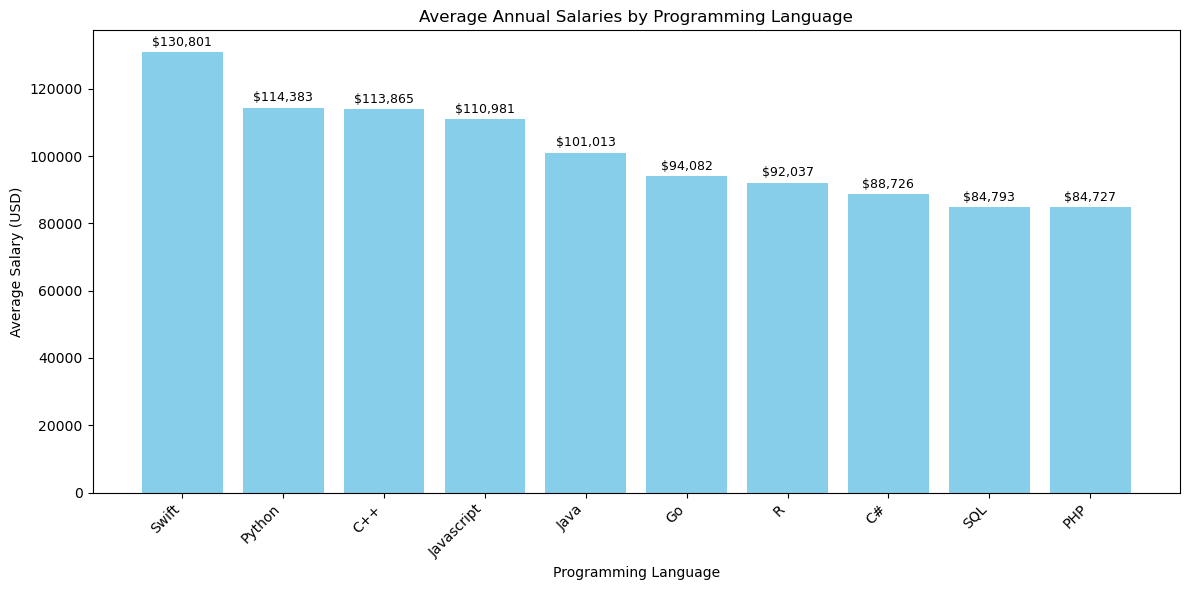

In [46]:
df = pd.read_csv("popular-languages.csv")

# Sort by salary for better visualization
df_sorted = df.sort_values(by="average_salaries", ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted["language_names"], df_sorted["average_salaries"], color="skyblue")

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1000, f"${height:,}", 
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Average Annual Salaries by Programming Language")
plt.xlabel("Programming Language")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("popular_languages_salaries_chart.png", dpi=300)

plt.show()

Save the scrapped data into a file named *popular-languages.csv*


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
